# Sử dụng mạng Neural Network

In [1]:
#thêm các thư viện cần thiết
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from keras import backend as K
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [2]:
batch_size = 128  # Kích thước batch
num_classes = 10  # 10 lớp
epochs = 10    # Số epoches

In [3]:
# kích thước ảnh
img_rows, img_cols = 28, 28

# split data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000] # tập validation
X_train, y_train = X_train[:50000,:], y_train[:50000]

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Kích thước đầu vào (ảnh đen trắng)
X_train[0].shape

(28, 28)

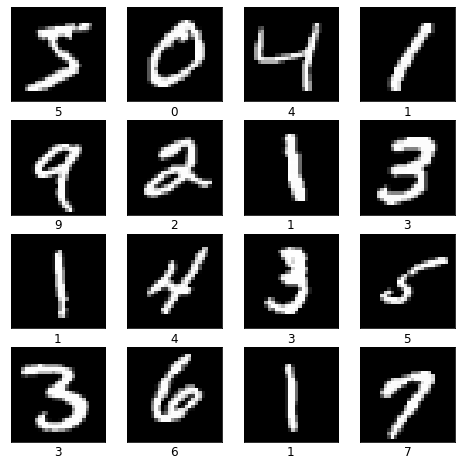

In [5]:
# Hiển thị dữ liệu train
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(f'{y_train[i]}', fontsize = 12)
plt.show()

In [6]:
# Flatten. Datapoint is row
X_train = X_train.reshape(-1, 784)
X_train = X_train.astype('float32')
X_test = X_test.reshape(-1, 784)
X_test = X_test.astype('float32')
X_val = X_val.reshape(-1, 784)
X_val = X_val.astype('float32')
# normalize (0-1)
X_train /= 255
X_val /= 255
X_test /= 255
print('Train samples: \t', X_train.shape[0])
print('Test samples: \t', X_test.shape[0])

Train samples: 	 50000
Test samples: 	 10000


In [ ]:
# convert to one-hot encoding (binary class matrices)
print(y_train[0])
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = Sequential()

# input shape
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
H = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # log or not
          validation_data=(X_val, y_val))

Epoch 1/10
391/391 [==============================] - 8s 10ms/step - loss: 0.3867 - accuracy: 0.8924 - val_loss: 0.1754 - val_accuracy: 0.9545
Epoch 2/10
391/391 [==============================] - 3s 9ms/step - loss: 0.1595 - accuracy: 0.9537 - val_loss: 0.1332 - val_accuracy: 0.9609
Epoch 3/10
391/391 [==============================] - 3s 9ms/step - loss: 0.1160 - accuracy: 0.9659 - val_loss: 0.1056 - val_accuracy: 0.9684
Epoch 4/10
391/391 [==============================] - 3s 8ms/step - loss: 0.0893 - accuracy: 0.9733 - val_loss: 0.0964 - val_accuracy: 0.9709
Epoch 5/10
391/391 [==============================] - 3s 9ms/step - loss: 0.0706 - accuracy: 0.9793 - val_loss: 0.0935 - val_accuracy: 0.9721
Epoch 6/10
391/391 [==============================] - 3s 8ms/step - loss: 0.0578 - accuracy: 0.9829 - val_loss: 0.0854 - val_accuracy: 0.9733
Epoch 7/10
391/391 [==============================] - 3s 9ms/step - loss: 0.0476 - accuracy: 0.9853 - val_loss: 0.0890 - val_accuracy: 0.9737
Epoch

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: \t', score[0])
print('Test accuracy: \t', score[1])

Test loss: 	 0.07796211540699005
Test accuracy: 	 0.9771999716758728


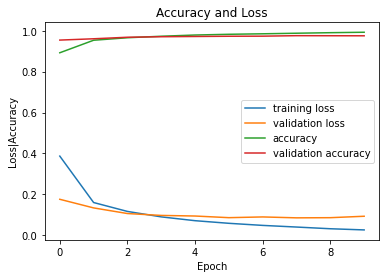

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

## Confus matrix


+ precision = 0.977
+ recall = 0.977
+ f1_score = 0.977


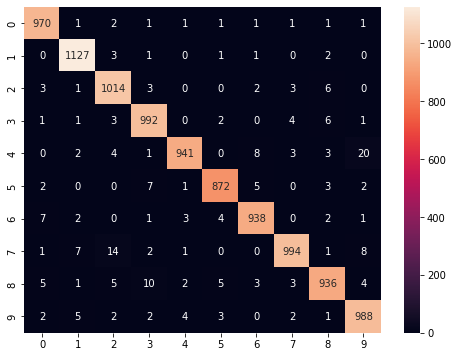

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred ,axis = 1)
y_true=np.argmax(y_test,axis = 1)
a = precision_recall_fscore_support(y_true, y_pred, average='macro')
cf = confusion_matrix(y_true,y_pred)

print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')
plt.figure(figsize = (8,6))
ax = sns.heatmap(data=cf ,fmt="d",annot = True)
plt.show()

## Tinh chỉnh model như thay đổi learning rate, activation function 


Learning rate = 0.100000

Learning rate = 0.005000

Learning rate = 0.010000

Learning rate = 0.000010

Learning rate = 0.200000


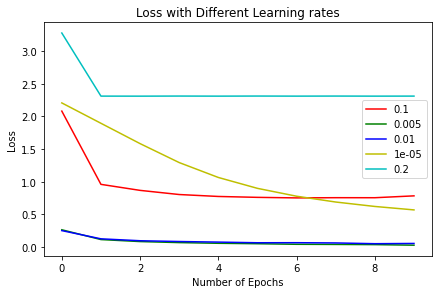

In [ ]:
# Thử với các learning rate khác nhau (giữ nguyên các layer, node và activation function)
learning_rate = [0.1, 0.005, 0.01, 0.00001, 0.2]
colors = ['r', 'g', 'b', 'y', 'c']
for i, lr in enumerate(learning_rate):
  model = Sequential()
  
  model.add(Dense(128, activation='relu', input_shape=(784,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])
  print('\nLearning rate = %f' %(lr))
  H = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs = epochs,
                verbose=0,
                validation_data=(X_test, y_test))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with Different Learning rates')
plt.legend(learning_rate)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()


Activation function = sigmoid

Activation function = tanh

Activation function = relu

Activation function = softmax

Activation function = linear


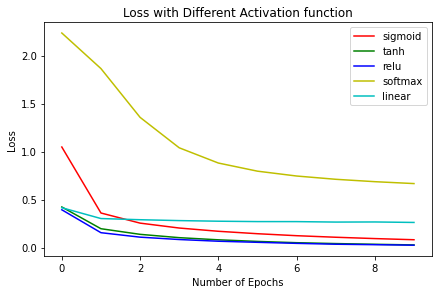

In [ ]:
# Đổi activation function thành sigmoid, tanh, softmax, linear
activation_function = ['sigmoid', 'tanh', 'relu', 'softmax', 'linear']
for i, af in enumerate(activation_function):
  model = Sequential()
  
  model.add(Dense(128, activation=af, input_shape=(784,)))
  model.add(Dense(32, activation=af))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])
  print('\nActivation function = %s' %(af))
  H = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs = epochs,
                verbose=0,
                validation_data=(X_test, y_test))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with Different Activation function')
plt.legend(activation_function)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

# Sử dụng mạng Convolutional Neural Network

In [ ]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

Load dữ liệu từ MNIST dataset, bao gồm 60.000 training set và 10.000 test set. Sau đó chia bộ traning set thành 2: 50.000 cho training set và 10.000 dữ liệu cho validation set.

In [ ]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000] # tập validation
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
print(X_val.shape)

(50000, 28, 28)
(10000, 28, 28)


Dữ liệu input cho mô hình convolutional neural network là 1 tensor 4 chiều (N, W, H, D), trong bài này là ảnh xám nên W = H = 28, D = 1, N là số lượng ảnh cho mỗi lần training. Do dữ liệu ảnh ở trên có kích thước là (N, 28, 28) tức là (N, W, H) nên rần reshape lại thành kích thước N * 28 * 28 * 1 để giống kích thước mà keras yêu cầu.

In [ ]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.
print(X_train.shape)

(50000, 28, 28, 1)


In [ ]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Bước này định nghĩa model:
1. Model = Sequential() để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. Ví dụ input -> CONV -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT
2.  Ở layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape = (W, H, D), ta dùng ảnh xám kích thước (28,28) nên input_shape = (28, 28, 1)
3. Khi thêm Convolutional Layer ta cần chỉ rõ các tham số: K (số lượng layer), kernel size (W, H), hàm activation sử dụng. cấu trúc: model.add(Conv2D(K, (W, H), activation='tên_hàm_activation'))
4. Khi thêm Maxpooling Layer cần chỉ rõ size của kernel, model.add(MaxPooling2D(pool_size=(W, H)))
5. Bước Flatten chuyển từ tensor sang vector chỉ cần thêm flatten layer.
6. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trong layer và hàm activation sử dụng trong layer, cấu trúc: model.add(Dense(số_lượng_node activation='tên_hàm activation'))


In [ ]:
# BatchNormalization()
# Init Weight ()

# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))

# Thêm Max pooling layer
model.add(MaxPooling2D())

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='relu'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               802944    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/10
391/391 [==============================] - 13s 14ms/step - loss: 0.2182 - accuracy: 0.9354 - val_loss: 0.0724 - val_accuracy: 0.9795
Epoch 2/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0545 - accuracy: 0.9830 - val_loss: 0.0544 - val_accuracy: 0.9845
Epoch 3/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0434 - val_accuracy: 0.9879
Epoch 4/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0431 - val_accuracy: 0.9885
Epoch 5/10
391/391 [==============================] - 5s 14ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0524 - val_accuracy: 0.9854
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0518 - val_accuracy: 0.9866
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0431 - val_accuracy: 0.989

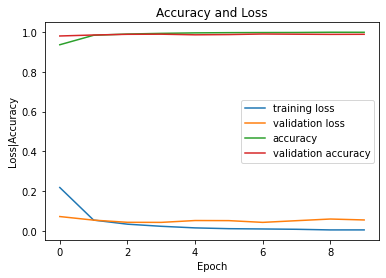

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04508180916309357, 0.9886999726295471]


Giá trị dự đoán:  7


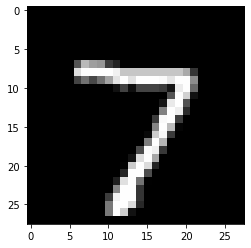

In [ ]:
# 10. Dự đoán ảnh
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

Chỉnh các hyperparameter: learning rate, activation function. và nhận xét các tham số của model như thế nào


Learning rate = 0.100000

Learning rate = 0.005000

Learning rate = 0.010000

Learning rate = 0.000010

Learning rate = 0.200000


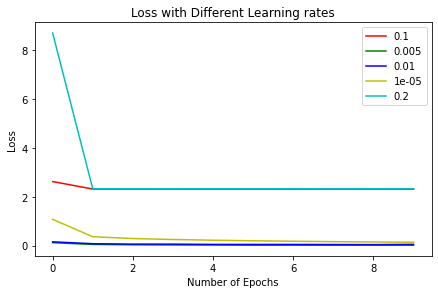

In [ ]:
# Thử với các learning rate khác nhau (giữ nguyên các layer, node và activation function)
learning_rate = [0.1, 0.005, 0.01, 0.00001, 0.2]
colors = ['r', 'g', 'b', 'y', 'c']
for i, lr in enumerate(learning_rate):

  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])
  print('\nLearning rate = %f' %(lr))
  H = model.fit(X_train, Y_train,
                batch_size=32,
                epochs = epochs,
                verbose=0,
                validation_data=(X_val, Y_val))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with Different Learning rates')
plt.legend(learning_rate)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()


Activation function = sigmoid

Activation function = tanh

Activation function = relu

Activation function = softmax

Activation function = linear


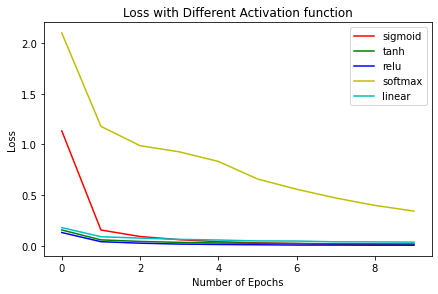

In [ ]:
# Đổi activation function thành sigmoid, tanh, softmax, linear
activation_function = ['sigmoid', 'tanh', 'relu', 'softmax', 'linear']
colors = ['r', 'g', 'b', 'y', 'c']
for i, af in enumerate(activation_function):

  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same', activation=af, input_shape=(28,28,1)))
  model.add(Conv2D(32, (3, 3), activation=af))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128, activation=af))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])
  print('\nActivation function = %s' %(af))
  H = model.fit(X_train, Y_train,
                batch_size=32,
                epochs = epochs,
                verbose=0,
                validation_data=(X_val, Y_val))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with Different Activation function')
plt.legend(activation_function)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

Nhận xét: qua các lần thay thay đổi learning rate và activation function cho thấy nếu learning rate quá cao sẽ ảnh hưởng tới cách học của model

Các activation fucntion đều cho các loss tốt trừ hàm softmax, bởi vì hàm softmax đầu ra là phần trăm phân loại của các lớp. Hàm relu là tốt nhất vì từ ngay epoch đầu tiền đã cho hàm loss nhỏ nhất

# confusion_matrix

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred ,axis = 1)
y_true=np.argmax(Y_test,axis = 1)

In [ ]:
cf = confusion_matrix(y_true,y_pred)

+ precision = 0.989
+ recall = 0.988
+ f1_score = 0.989


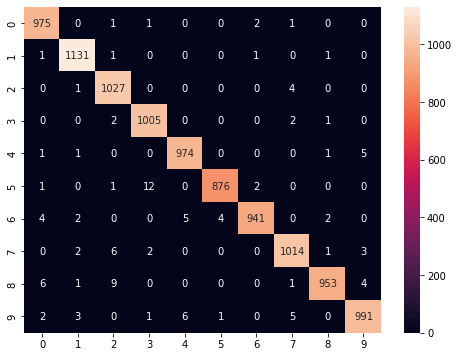

In [ ]:
a = precision_recall_fscore_support(y_true, y_pred, average='macro')


print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')
plt.figure(figsize = (8,6))
ax = sns.heatmap(data=cf ,fmt="d",annot = True)
plt.show()

